In [1]:
import pandas as pd 
import requests 
import numpy as np
from bs4 import BeautifulSoup 

req = requests.get("http://www.healthysf.org/bdi/outcomes/zipmap.htm") 
soup = BeautifulSoup(req.content,'lxml') 
table = soup.find_all('table') 
df = pd.read_html(str(table)) 

df=pd.DataFrame(df[4]) 
print ('Done')

Done


In [2]:
df

,0,1,2
0,Zip Code,Neighborhood,Population (Census 2000)
1,94102,Hayes Valley/Tenderloin/North of Market,28991
2,94103,South of Market,23016
3,94107,Potrero Hill,17368
4,94108,Chinatown,13716
5,94109,Polk/Russian Hill (Nob Hill),56322
6,94110,Inner Mission/Bernal Heights,74633
7,94112,Ingelside-Excelsior/Crocker-Amazon,73104
8,94114,Castro/Noe Valley,30574
9,94115,Western Addition/Japantown,33115


In [3]:
df.columns = df.iloc[0]
df = df.iloc[1:-1, :-1]
d_sf = df
d_sf

,Zip Code,Neighborhood
1,94102,Hayes Valley/Tenderloin/North of Market
2,94103,South of Market
3,94107,Potrero Hill
4,94108,Chinatown
5,94109,Polk/Russian Hill (Nob Hill)
6,94110,Inner Mission/Bernal Heights
7,94112,Ingelside-Excelsior/Crocker-Amazon
8,94114,Castro/Noe Valley
9,94115,Western Addition/Japantown
10,94116,Parkside/Forest Hill


In [4]:
d_sf_price = d_sf.assign(MedianHomePrice = [1320000, 1200000, 1898000, 1280000, 1550000, 1700000, 1200000, 2000000, 2150000, 1500000, 3250000, 1600000, 1660000, 1500000, 2300000, 900000, 1565000, 1830000, 1900000, 1280000, 910000])
d_sf_price

,Zip Code,Neighborhood,MedianHomePrice
1,94102,Hayes Valley/Tenderloin/North of Market,1320000
2,94103,South of Market,1200000
3,94107,Potrero Hill,1898000
4,94108,Chinatown,1280000
5,94109,Polk/Russian Hill (Nob Hill),1550000
6,94110,Inner Mission/Bernal Heights,1700000
7,94112,Ingelside-Excelsior/Crocker-Amazon,1200000
8,94114,Castro/Noe Valley,2000000
9,94115,Western Addition/Japantown,2150000
10,94116,Parkside/Forest Hill,1500000


In [5]:
sf_school = pd.read_csv('https://raw.githubusercontent.com/Undarm/Capstone-/main/Map_of_Schools.csv') 
print (sf_school.head())

                                         Campus Name CCSF Entity  Lower Grade  \
0                 Milk, Harvey Milk Childrens Center       SFUSD           -2   
1                         Mckinley Elementary School       SFUSD            0   
2  Jewish Community Center San Francisco - Rosenb...     Private           -2   
3                             Eureka Learning Center     Private           -2   
4                     Noriega Early Education School       SFUSD           -2   

   Upper Grade Grade Range               Category Map Label  Lower Age  \
0           -1          PK               USD PreK    CDC095          3   
1            5         K-5         USD Grades K-5     PS075          5   
2           -1          PK  Independent / Private    CDC058          3   
3           -1          PK  Independent / Private    CDC035          3   
4            5        PK-5          USD PreK/TK-5     PS085          3   

   Upper Age General Type      CDS Code  \
0          4          CDC

In [6]:
sf_school = pd.DataFrame(sf_school, columns=['Campus Name', 'CCSF Entity', 'Grade Range', 'Campus Address'])
sf_school

,Campus Name,CCSF Entity,Grade Range,Campus Address
0,"Milk, Harvey Milk Childrens Center",SFUSD,PK,"841 ELLIS ST, SAN FRANCISCO CA 94117"
1,Mckinley Elementary School,SFUSD,K-5,"1025 14TH ST, San Francisco, CA 94114"
2,Jewish Community Center San Francisco - Rosenb...,Private,PK,"325 ARGUELLO BLVD, SAN FRANCISCO, CA 94118"
3,Eureka Learning Center,Private,PK,"464 DIAMOND ST, SAN FRANCISCO, CA 94114"
4,Noriega Early Education School,SFUSD,PK-5,"1775 44TH AVE, San Francisco, CA 94122"
...,...,...,...,...
440,Golden Gate Guppies Preschool,Private,PK,"2426 CALIFORNIA ST, SAN FRANCISCO, CA 94115"
441,Lands End School,Private,PK,"4150 CLEMENT ST BLDG T35, SAN FRANCISCO, CA 94121"
442,San Francisco Pacific Academy,Private,K-8,"3301 BALBOA ST, SAN FRANCISCO, CA 94121"
443,"Wells, Ida B. Wells High School",SFUSD,9-12,"1099 HAYES ST, SAN FRANCISCO, CA 94117"


In [7]:
sf_school.dtypes

Campus Name       object
CCSF Entity       object
Grade Range       object
Campus Address    object
dtype: object

In [8]:
sf_school['Campus Address'] = sf_school['Campus Address'].astype('str')

In [9]:
sf_school['Zip Code']=sf_school['Campus Address'].str[-5:]
print (sf_school)

                                           Campus Name CCSF Entity  \
0                   Milk, Harvey Milk Childrens Center       SFUSD   
1                           Mckinley Elementary School       SFUSD   
2    Jewish Community Center San Francisco - Rosenb...     Private   
3                               Eureka Learning Center     Private   
4                       Noriega Early Education School       SFUSD   
..                                                 ...         ...   
440                      Golden Gate Guppies Preschool     Private   
441                                   Lands End School     Private   
442                      San Francisco Pacific Academy     Private   
443                    Wells, Ida B. Wells High School       SFUSD   
444          Munchkinland Preschool And Family Daycare     Private   

    Grade Range                                     Campus Address Zip Code  
0            PK               841 ELLIS ST, SAN FRANCISCO CA 94117    94117  
1  

In [10]:
sf_school = pd.DataFrame(sf_school, columns=['Grade Range', 'Zip Code'])
sf_school

,Grade Range,Zip Code
0,PK,94117
1,K-5,94114
2,PK,94118
3,PK,94114
4,PK-5,94122
...,...,...
440,PK,94115
441,PK,94121
442,K-8,94121
443,9-12,94117


In [11]:
sf_school = sf_school.groupby(["Zip Code"], as_index=False).count()
sf_school.head()

,Zip Code,Grade Range
0,94102,23
1,94103,14
2,94105,6
3,94107,20
4,94108,12


In [12]:
sf_school = sf_school.rename(columns={'Grade Range': 'Schools'})

In [13]:
df=pd.merge(d_sf_price, sf_school, on='Zip Code', how='left')
df

,Zip Code,Neighborhood,MedianHomePrice,Schools
0,94102,Hayes Valley/Tenderloin/North of Market,1320000,23
1,94103,South of Market,1200000,14
2,94107,Potrero Hill,1898000,20
3,94108,Chinatown,1280000,12
4,94109,Polk/Russian Hill (Nob Hill),1550000,10
5,94110,Inner Mission/Bernal Heights,1700000,41
6,94112,Ingelside-Excelsior/Crocker-Amazon,1200000,28
7,94114,Castro/Noe Valley,2000000,20
8,94115,Western Addition/Japantown,2150000,37
9,94116,Parkside/Forest Hill,1500000,25


In [14]:
pip install geocoder

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 10.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import geocoder

In [16]:
def get_latilong(zip_code):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, San Francisco, California'.format(zip_code))
        lat_lng_coords = g.latlng
    
    return lat_lng_coords

In [17]:
zip_codes = df['Zip Code']
coords = [get_latilong(zip_code) for zip_code in zip_codes.tolist()]

In [18]:
df_coords = pd.DataFrame(coords, columns = ['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [19]:
df

,Zip Code,Neighborhood,MedianHomePrice,Schools,Latitude,Longitude
0,94102,Hayes Valley/Tenderloin/North of Market,1320000,23,37.777015,-122.421875
1,94103,South of Market,1200000,14,37.772000,-122.408735
2,94107,Potrero Hill,1898000,20,37.759050,-122.398155
3,94108,Chinatown,1280000,12,37.792160,-122.408220
4,94109,Polk/Russian Hill (Nob Hill),1550000,10,37.790105,-122.420590
5,94110,Inner Mission/Bernal Heights,1700000,41,37.745185,-122.415905
6,94112,Ingelside-Excelsior/Crocker-Amazon,1200000,28,37.717485,-122.440255
7,94114,Castro/Noe Valley,2000000,20,37.759975,-122.437105
8,94115,Western Addition/Japantown,2150000,37,37.784895,-122.435125
9,94116,Parkside/Forest Hill,1500000,25,37.740140,-122.499415


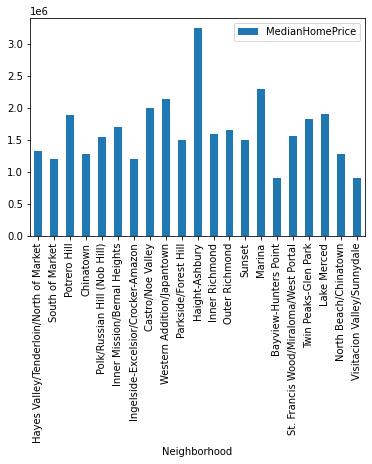

In [20]:
import matplotlib.pyplot as plt
df.plot(x='Neighborhood', y='MedianHomePrice', kind='bar')
plt.show()

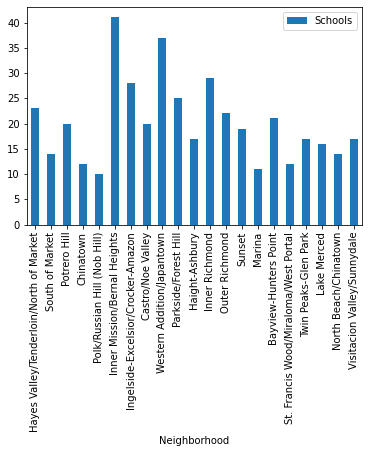

In [21]:
df.plot(x='Neighborhood', y='Schools', kind='bar')
plt.show()

In [22]:
pip install geopy

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 5.7 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
import json 

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Libraries imported.


In [25]:
address = 'San Francisco, California USA'

geolocator = Nominatim(user_agent="san_francisco_expl")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.419906.


In [26]:
map_sf = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf

In [27]:
CLIENT_ID = 'UJ002OVNS0I4D1LGQ52YH5IMRGXL3OH1QWOQI1L2E22DOBK5'
CLIENT_SECRET = 'DZMM2DM2QZNYQWH0XV0I1DDJNF03XP24CMIPJYQUZPFOPSLR'
VERSION = '20180605' 
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: Hidden')
print('CLIENT_SECRET:Hidden')

Your credentails:
CLIENT_ID: Hidden
CLIENT_SECRET:Hidden


In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
sf_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Hayes Valley/Tenderloin/North of Market
South of Market
Potrero Hill
Chinatown
Polk/Russian Hill (Nob Hill)
Inner Mission/Bernal Heights
Ingelside-Excelsior/Crocker-Amazon
Castro/Noe Valley
Western Addition/Japantown
Parkside/Forest Hill
Haight-Ashbury
Inner Richmond
Outer Richmond
Sunset
Marina
Bayview-Hunters Point
St. Francis Wood/Miraloma/West Portal
Twin Peaks-Glen Park
Lake Merced
North Beach/Chinatown
Visitacion Valley/Sunnydale


In [30]:
print(sf_venues.shape)
sf_venues.head()

(1182, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley/Tenderloin/North of Market,37.777015,-122.421875,SFJazz Center,37.776350,-122.421539,Jazz Club
1,Hayes Valley/Tenderloin/North of Market,37.777015,-122.421875,Dumpling Home,37.776050,-122.422969,Dumpling Restaurant
2,Hayes Valley/Tenderloin/North of Market,37.777015,-122.421875,Blue Bottle Coffee,37.776430,-122.423224,Coffee Shop
3,Hayes Valley/Tenderloin/North of Market,37.777015,-122.421875,Louise M. Davies Symphony Hall,37.777976,-122.420157,Concert Hall
4,Hayes Valley/Tenderloin/North of Market,37.777015,-122.421875,Fig & Thistle Wine Bar,37.777256,-122.423365,Wine Bar


In [31]:
print('There are {} uniques categories.'.format(len(sf_venues['Venue Category'].unique())))

There are 244 uniques categories.


In [32]:
sf_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview-Hunters Point,24,24,24,24,24,24
Castro/Noe Valley,84,84,84,84,84,84
Chinatown,100,100,100,100,100,100
Haight-Ashbury,85,85,85,85,85,85
Hayes Valley/Tenderloin/North of Market,100,100,100,100,100,100
Ingelside-Excelsior/Crocker-Amazon,46,46,46,46,46,46
Inner Mission/Bernal Heights,29,29,29,29,29,29
Inner Richmond,58,58,58,58,58,58
Lake Merced,24,24,24,24,24,24


In [33]:
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 

fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

sf_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,...,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,...,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Bayview-Hunters Point,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,Castro/Noe Valley,0.000000,0.000000,0.011905,0.000000,0.000000,0.011905,0.000000,0.00,0.011905,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.023810,0.011905,0.000000,0.023810
2,Chinatown,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.020000,0.010000,0.01,0.000000,0.000000,0.010000,0.010000
3,Haight-Ashbury,0.000000,0.023529,0.000000,0.000000,0.000000,0.011765,0.011765,0.00,0.000000,...,0.00,0.000000,0.00,0.011765,0.011765,0.00,0.011765,0.000000,0.011765,0.011765
4,Hayes Valley/Tenderloin/North of Market,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.010000,0.010000,0.00,0.050000,0.010000,0.000000,0.010000
5,Ingelside-Excelsior/Crocker-Amazon,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.043478,0.00,0.000000,0.000000,0.000000,0.000000
6,Inner Mission/Bernal Heights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.034483,0.00,0.000000,0.000000,0.000000,0.034483
7,Inner Richmond,0.017241,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.017241,...,0.00,0.017241,0.00,0.000000,0.000000,0.00,0.017241,0.034483,0.000000,0.000000
8,Lake Merced,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.041667
9,Marina,0.000000,0.000000,0.000000,0.000000,0.010417,0.020833,0.000000,0.00,0.000000,...,0.00,0.000000,0.00,0.000000,0.010417,0.00,0.041667,0.010417,0.010417,0.010417


In [35]:
num_top_venues = 5

for hood in sf_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sf_grouped[sf_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bayview-Hunters Point----
                             venue  freq
0                             Park  0.17
1  Southern / Soul Food Restaurant  0.08
2                      Bus Station  0.04
3                           Market  0.04
4              Fried Chicken Joint  0.04


----Castro/Noe Valley----
             venue  freq
0          Gay Bar  0.11
1  Thai Restaurant  0.05
2      Coffee Shop  0.05
3             Park  0.04
4      Yoga Studio  0.02


----Chinatown----
             venue  freq
0           Bakery  0.05
1      Coffee Shop  0.05
2            Hotel  0.05
3  Bubble Tea Shop  0.03
4        Hotel Bar  0.03


----Haight-Ashbury----
                    venue  freq
0                Boutique  0.07
1             Coffee Shop  0.06
2          Clothing Store  0.05
3  Thrift / Vintage Store  0.05
4       Convenience Store  0.04


----Hayes Valley/Tenderloin/North of Market----
              venue  freq
0          Wine Bar  0.05
1  Sushi Restaurant  0.04
2       Pizza Place  0.04
3    

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview-Hunters Point,Park,Southern / Soul Food Restaurant,Latin American Restaurant,Pizza Place,Playground,Non-Profit,Fried Chicken Joint,Bus Station,Skate Park,Mexican Restaurant
1,Castro/Noe Valley,Gay Bar,Thai Restaurant,Coffee Shop,Park,Playground,Seafood Restaurant,Cosmetics Shop,Convenience Store,Mediterranean Restaurant,Deli / Bodega
2,Chinatown,Coffee Shop,Hotel,Bakery,Hotel Bar,Spa,Bubble Tea Shop,Bar,Men's Store,Steakhouse,Dim Sum Restaurant
3,Haight-Ashbury,Boutique,Coffee Shop,Thrift / Vintage Store,Clothing Store,Shoe Store,Convenience Store,Bookstore,Breakfast Spot,Café,Ice Cream Shop
4,Hayes Valley/Tenderloin/North of Market,Wine Bar,Sushi Restaurant,Pizza Place,French Restaurant,Boutique,Cocktail Bar,Bakery,Coffee Shop,New American Restaurant,Mexican Restaurant
5,Ingelside-Excelsior/Crocker-Amazon,Mexican Restaurant,Pizza Place,Bar,Filipino Restaurant,Restaurant,Vietnamese Restaurant,Sandwich Place,Burrito Place,Bus Station,Bakery
6,Inner Mission/Bernal Heights,Playground,Mexican Restaurant,Park,Yoga Studio,Sandwich Place,Brewery,Mediterranean Restaurant,Burrito Place,Food & Drink Shop,Scenic Lookout
7,Inner Richmond,Mobile Phone Shop,Wine Shop,Burmese Restaurant,Shipping Store,Italian Restaurant,Japanese Restaurant,Thai Restaurant,Coffee Shop,Pizza Place,ATM
8,Lake Merced,Rental Car Location,Light Rail Station,Park,Pizza Place,Coffee Shop,Yoga Studio,Burger Joint,Ice Cream Shop,Laundromat,Gas Station
9,Marina,Wine Bar,Italian Restaurant,Gym / Fitness Center,Cosmetics Shop,French Restaurant,Sandwich Place,Park,Bar,Sushi Restaurant,Taco Place


In [38]:
kclusters = 3

sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_grouped_clustering)

kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

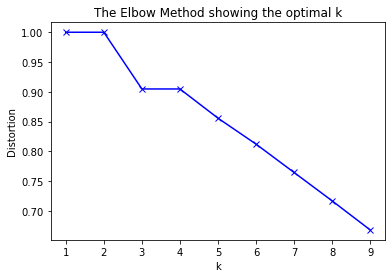

In [39]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(sf_grouped_clustering)
    distortions.append(sum(np.min(cdist(sf_grouped_clustering, kmeanModel.cluster_centers_, 'jaccard'), axis=1)) / sf_grouped_clustering.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [40]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sf_merged = df

sf_merged = sf_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sf_merged.head()

,Zip Code,Neighborhood,MedianHomePrice,Schools,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94102,Hayes Valley/Tenderloin/North of Market,1320000,23,37.777015,-122.421875,0,Wine Bar,Sushi Restaurant,Pizza Place,French Restaurant,Boutique,Cocktail Bar,Bakery,Coffee Shop,New American Restaurant,Mexican Restaurant
1,94103,South of Market,1200000,14,37.772000,-122.408735,0,Nightclub,Gay Bar,Café,Furniture / Home Store,Cocktail Bar,Motorcycle Shop,Clothing Store,Coffee Shop,Dance Studio,Music Venue
2,94107,Potrero Hill,1898000,20,37.759050,-122.398155,0,Café,Grocery Store,Breakfast Spot,Coffee Shop,Indie Theater,Liquor Store,Mac & Cheese Joint,Bookstore,Gift Shop,Mexican Restaurant
3,94108,Chinatown,1280000,12,37.792160,-122.408220,0,Coffee Shop,Hotel,Bakery,Hotel Bar,Spa,Bubble Tea Shop,Bar,Men's Store,Steakhouse,Dim Sum Restaurant
4,94109,Polk/Russian Hill (Nob Hill),1550000,10,37.790105,-122.420590,0,Thai Restaurant,Grocery Store,Café,Massage Studio,Sushi Restaurant,Bar,Diner,Gym / Fitness Center,Pet Store,Yoga Studio


In [41]:
sf_merged.isnull().sum()

Zip Code                  0
Neighborhood              0
MedianHomePrice           0
Schools                   0
Latitude                  0
Longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

In [42]:
sf_merged.dropna(inplace=True)
sf_merged = df.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='inner')
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster, price, school in zip(sf_merged['Latitude'], sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels'], sf_merged['MedianHomePrice'], sf_merged['Schools']):
    label = folium.Popup(str(poi) + ', Cluster-' + str(cluster) + ', HOUSE PRICE-' + str(price) + ', SCHOOLS-' + str(school), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
sf_merged

,Zip Code,Neighborhood,MedianHomePrice,Schools,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94102,Hayes Valley/Tenderloin/North of Market,1320000,23,37.777015,-122.421875,0,Wine Bar,Sushi Restaurant,Pizza Place,French Restaurant,Boutique,Cocktail Bar,Bakery,Coffee Shop,New American Restaurant,Mexican Restaurant
1,94103,South of Market,1200000,14,37.772000,-122.408735,0,Nightclub,Gay Bar,Café,Furniture / Home Store,Cocktail Bar,Motorcycle Shop,Clothing Store,Coffee Shop,Dance Studio,Music Venue
2,94107,Potrero Hill,1898000,20,37.759050,-122.398155,0,Café,Grocery Store,Breakfast Spot,Coffee Shop,Indie Theater,Liquor Store,Mac & Cheese Joint,Bookstore,Gift Shop,Mexican Restaurant
3,94108,Chinatown,1280000,12,37.792160,-122.408220,0,Coffee Shop,Hotel,Bakery,Hotel Bar,Spa,Bubble Tea Shop,Bar,Men's Store,Steakhouse,Dim Sum Restaurant
4,94109,Polk/Russian Hill (Nob Hill),1550000,10,37.790105,-122.420590,0,Thai Restaurant,Grocery Store,Café,Massage Studio,Sushi Restaurant,Bar,Diner,Gym / Fitness Center,Pet Store,Yoga Studio
5,94110,Inner Mission/Bernal Heights,1700000,41,37.745185,-122.415905,0,Playground,Mexican Restaurant,Park,Yoga Studio,Sandwich Place,Brewery,Mediterranean Restaurant,Burrito Place,Food & Drink Shop,Scenic Lookout
6,94112,Ingelside-Excelsior/Crocker-Amazon,1200000,28,37.717485,-122.440255,0,Mexican Restaurant,Pizza Place,Bar,Filipino Restaurant,Restaurant,Vietnamese Restaurant,Sandwich Place,Burrito Place,Bus Station,Bakery
7,94114,Castro/Noe Valley,2000000,20,37.759975,-122.437105,0,Gay Bar,Thai Restaurant,Coffee Shop,Park,Playground,Seafood Restaurant,Cosmetics Shop,Convenience Store,Mediterranean Restaurant,Deli / Bodega
8,94115,Western Addition/Japantown,2150000,37,37.784895,-122.435125,0,Spa,Ice Cream Shop,Grocery Store,Tea Room,Boutique,Japanese Restaurant,Sushi Restaurant,Ramen Restaurant,Bakery,Gym / Fitness Center
9,94116,Parkside/Forest Hill,1500000,25,37.740140,-122.499415,0,Bus Station,Chinese Restaurant,Soccer Field,Thai Restaurant,Café,Seafood Restaurant,Market,Supermarket,Coffee Shop,Baseball Field
